In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## 11.1: Counting Coins

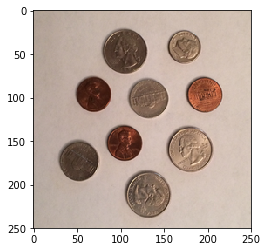

In [3]:
image = cv2.imread("../images/coins.png")
_ = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

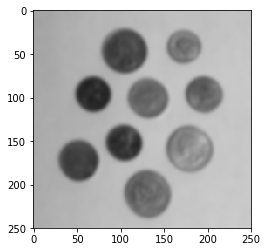

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
_ = plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_GRAY2RGB))

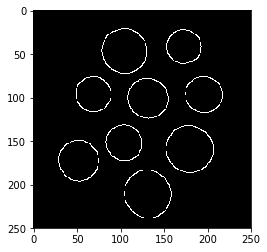

In [5]:
edged = cv2.Canny(blurred, 30, 150)
_ = plt.imshow(cv2.cvtColor(edged, cv2.COLOR_GRAY2RGB))

I count 9 coins in this image


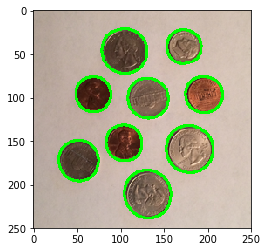

In [8]:
(_, cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("I count {} coins in this image".format(len(cnts)))

coins = image.copy()
cv2.drawContours(coins, cnts, -1, (0, 255, 0), 2)
_ = plt.imshow(cv2.cvtColor(coins, cv2.COLOR_BGR2RGB))

I count 9 coins in this image


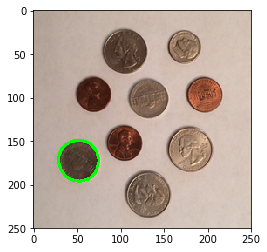

In [9]:
(_, cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("I count {} coins in this image".format(len(cnts)))

coins = image.copy()
cv2.drawContours(coins, cnts, 1, (0, 255, 0), 2)
_ = plt.imshow(cv2.cvtColor(coins, cv2.COLOR_BGR2RGB))

I count 9 coins in this image


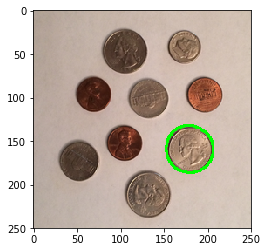

In [10]:
(_, cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("I count {} coins in this image".format(len(cnts)))

coins = image.copy()
cv2.drawContours(coins, cnts, 2, (0, 255, 0), 2)
_ = plt.imshow(cv2.cvtColor(coins, cv2.COLOR_BGR2RGB))

In [17]:
coins = {}
masked_coins = {}

for (i, c) in enumerate(cnts):
    (x, y, w, h) = cv2.boundingRect(c)
    
    name = i + 1
    coin = image[y:y + h, x:x + w]
    coins[name] = coin
    
    mask = np.zeros(image.shape[:2], dtype="uint8")
    ((centerX, centerY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(mask, (int(centerX), int(centerY)), int(radius), 255, -1)
    mask = mask[y:y + h, x:x + w]
    masked_coins[name] = cv2.bitwise_and(coin, coin, mask=mask)

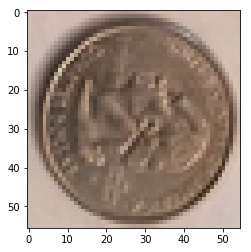

In [16]:
_ = plt.imshow(cv2.cvtColor(coins[1], cv2.COLOR_BGR2RGB))

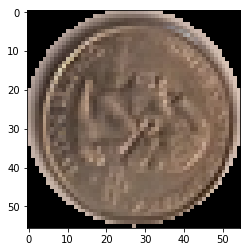

In [18]:
_ = plt.imshow(cv2.cvtColor(masked_coins[1], cv2.COLOR_BGR2RGB))

That's it!